# Segmentation

## Load

In [1]:
from segmentation import load


images = load('images', 'jpg')
images.keys()

dict_keys([25, 5, 19, 28, 29, 23, 3, 16, 13, 7, 4, 10, 2, 9, 22, 18])

Пока откинем изображения на пёстром фоне.

In [2]:
images_w = {}
for key in [2, 13, 3, 25, 4, 19, 5, 7]:
    images_w[key] = images[key]
images_w.keys()

dict_keys([2, 13, 3, 25, 4, 19, 5, 7])

## Visualize

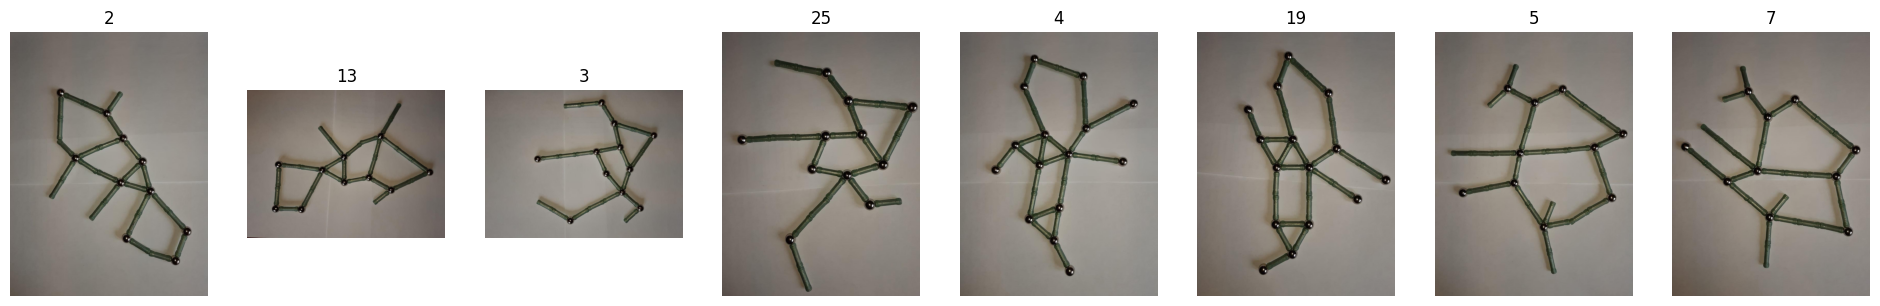

In [3]:
%matplotlib inline
from segmentation import imshow


imshow(images_w)

## Remove Shadows

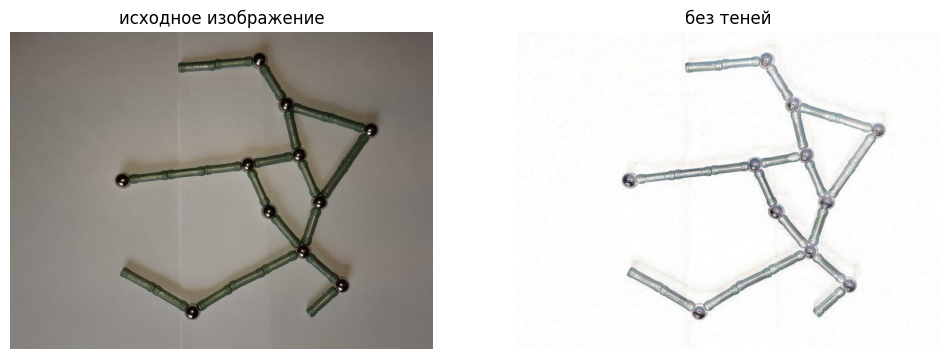

In [9]:
import matplotlib.pyplot as plt
from segmentation import rem_shadows


img = rem_shadows(images_w[3])
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(images_w[3])
ax[0].axis('off')
ax[0].set_title('исходное изображение')

ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('без теней')

plt.savefig('no_shadows_demo.svg', bbox_inches='tight')

## Binarize

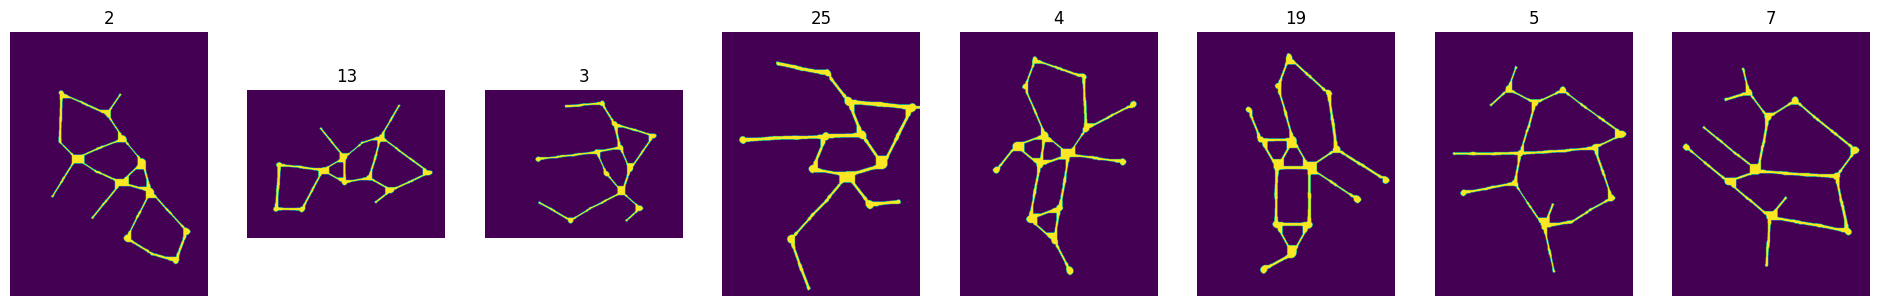

In [5]:
from segmentation import binarize


binarized = binarize(images_w)
imshow(binarized)

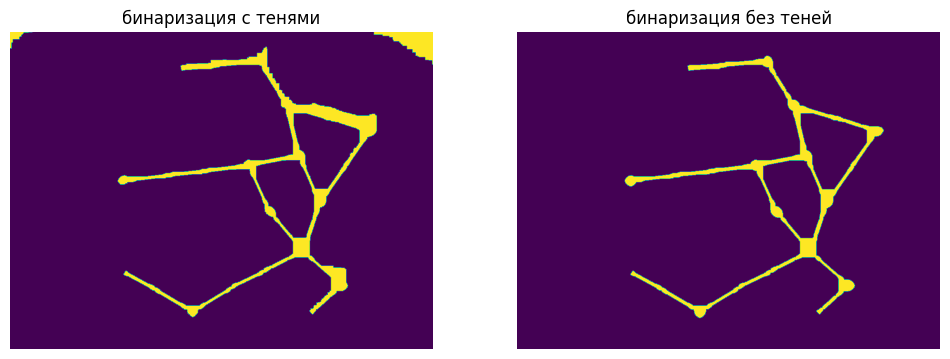

In [12]:
img_shad = binarize(images_w, do_rem_shadows=False)[3]
img_no_shad = binarize(images_w, do_rem_shadows=True)[3]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_shad)
ax[0].axis('off')
ax[0].set_title('бинаризация с тенями')

ax[1].imshow(img_no_shad)
ax[1].axis('off')
ax[1].set_title('бинаризация без теней')

plt.savefig('bin_demo.svg', bbox_inches='tight')

In [ ]:
img = rem_shadows(images_w[3])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(images_w[3])
ax[1].imshow(img)
ax[0].axis('off')
ax[1].axis('off')

## Add Nodes

In [10]:
import cv2


def find_circles(img_dict):
    res = {}
    for key, img in img_dict.items():
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        blurred = cv2.blur(gray, (2, 2))

        res[key] = cv2.HoughCircles(
            blurred, cv2.HOUGH_GRADIENT,
            1, 20, param1 = 50, param2 = 30,
            minRadius = 1, maxRadius = 40
        )
    return res

In [11]:
import numpy as np


def add_circle(binarized, detected_circles_dict):
    res = {}
    for key, detected_circles in detected_circles_dict.items():
        res[key] = binarized[key].copy()
        if detected_circles is None:
            continue

        detected_circles = np.uint16(np.around(detected_circles))
        for a, b, r in detected_circles[0, :]:
            # start = (a+2*r, b-2*r)
            # end = (a-2*r, b+2*r)
            # cv2.rectangle(res[key], start, end, color=255, thickness=-1)
            angle1 = round(np.random.uniform(low=0, high=180))
            angle2 = round(np.random.uniform(low=0, high=180))
            angle3 = round(np.random.uniform(low=0, high=180))
            axes=(round(1.25*r), round(r/4))
            cv2.ellipse(res[key], center=(a,b), axes=axes, angle=angle1, startAngle=0, endAngle=360, color=255, thickness=-1)
            # cv2.ellipse(res[key], center=(a,b), axes=axes, angle=angle2, startAngle=0, endAngle=360, color=255, thickness=-1)
            # cv2.ellipse(res[key], center=(a,b), axes=axes, angle=angle3, startAngle=0, endAngle=360, color=255, thickness=-1)
    return res 

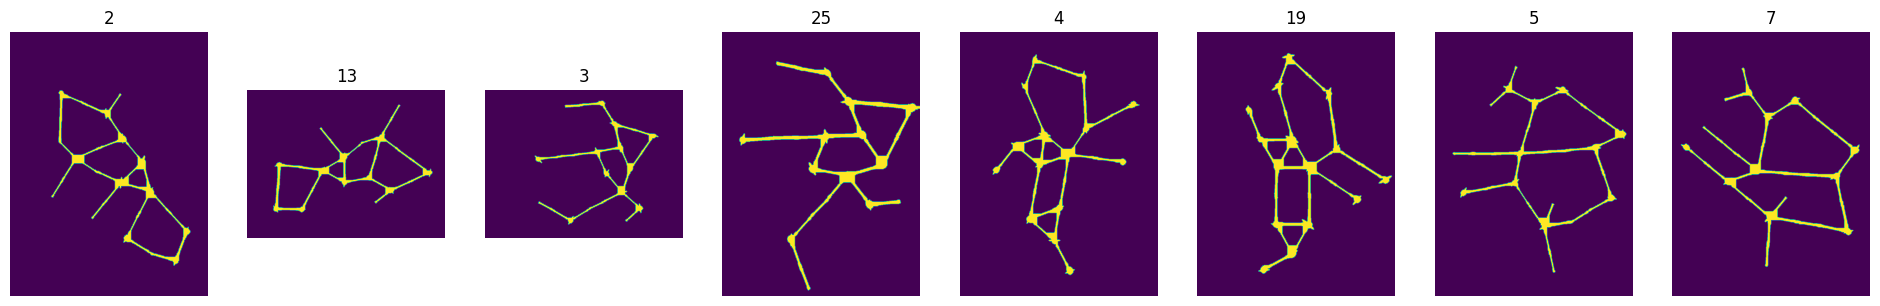

In [12]:
detected_circles_dict = find_circles(images_w)
with_circles = add_circle(binarized, detected_circles_dict)
imshow(with_circles)

## Save result

In [9]:
from segmentation import save


save(with_circles, 'binarized3')

True